<a href="https://colab.research.google.com/github/lamortizme/Instrumentos/blob/main/b_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

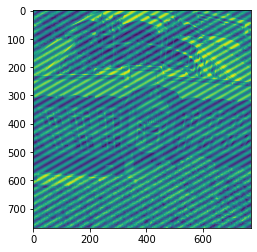

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
b= cv2.imread("/content/b.png",0)
plt.imshow(b)


In [2]:
TR=cv2.dft(np.float32(b),flags=cv2.DFT_COMPLEX_OUTPUT)
TR1= np.fft.fftshift(TR)


In [38]:
def icmask(radius,r,N,M):
  t, s = np.ogrid[0:N,0:M]
  mask = (t-352)**2 + (s-365)**2<=r*r 
  mask2 =(t-415)**2 + (s-400)**2 <= radius*radius
  mask3 = (t-N/2)**2 + (s-M/2)**2 <= radius*radius
  array = np.ones((N,M,2), np.uint8)
  array[mask] = 0
  array[mask2]=0
  array[mask2]=0
  #array[mask3]=0
  return array

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


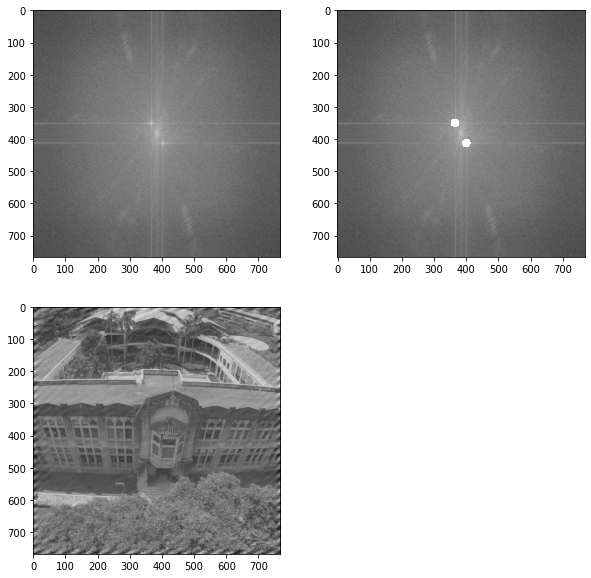

In [37]:
TR2 = 20* np.log(cv2.magnitude(TR1[:,:,0], TR1[:,:,1]))

rows, cols =b.shape

s2=icmask(35,25,rows,cols)
H=icmask(10,10,rows,cols)

dH=TR1*H
dHH=2000*np.log(cv2.magnitude(dH[:,:,0],dH[:,:,1]))

dHS=np.fft.ifftshift(dH)

Output= cv2.idft(dHS)
Output= cv2.magnitude(Output[:,:,0],Output[:,:,1])

fig=plt.figure(figsize=(10,10))
ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax1.imshow(TR2, cmap='gray')
ax2.imshow(dHH, cmap='gray')
ax3.imshow(Output, cmap='gray')
plt.show()
